In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

# Load the processed dataset
data = pd.read_csv(r'C:\Users\91952\Desktop\Credit card fraud detection\Data\credit_card_data_processed.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Apply Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# Apply Robust Scaling
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

# Save scaled data for later use
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_standard_scaled_df.to_csv(r'C:\Users\91952\Desktop\Credit card fraud detection\Data\credit_card_data_standard_scaled.csv', index=False)
X_robust_scaled_df.to_csv(r'C:\Users\91952\Desktop\Credit card fraud detection\Data\credit_card_data_robust_scaled.csv', index=False)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the robust scaled data
X = pd.read_csv(r'C:\Users\91952\Desktop\Credit card fraud detection\Data\credit_card_data_robust_scaled.csv')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Retrieve the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_


# Predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)
y_pred = best_rf_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Random Forest Model - Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Random Forest Model - Test Accuracy: {accuracy_test_rf:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       197
           1       0.99      0.93      0.96       197

    accuracy                           0.96       394
   macro avg       0.97      0.96      0.96       394
weighted avg       0.97      0.96      0.96       394

Confusion Matrix:
 [[196   1]
 [ 13 184]]
Random Forest Model - Training Accuracy: 0.9917
Random Forest Model - Test Accuracy: 0.9645


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)
# Make predictions
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))
print(f"Logistic Regression Model - Training Accuracy: {accuracy_train_lr:.4f}")
print(f"Logistic Regression Model - Test Accuracy: {accuracy_test_lr:.4f}")

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       197
           1       0.98      0.91      0.95       197

    accuracy                           0.95       394
   macro avg       0.95      0.95      0.95       394
weighted avg       0.95      0.95      0.95       394

Confusion Matrix (Logistic Regression):
 [[194   3]
 [ 17 180]]
Logistic Regression Model - Training Accuracy: 0.9568
Logistic Regression Model - Test Accuracy: 0.9492


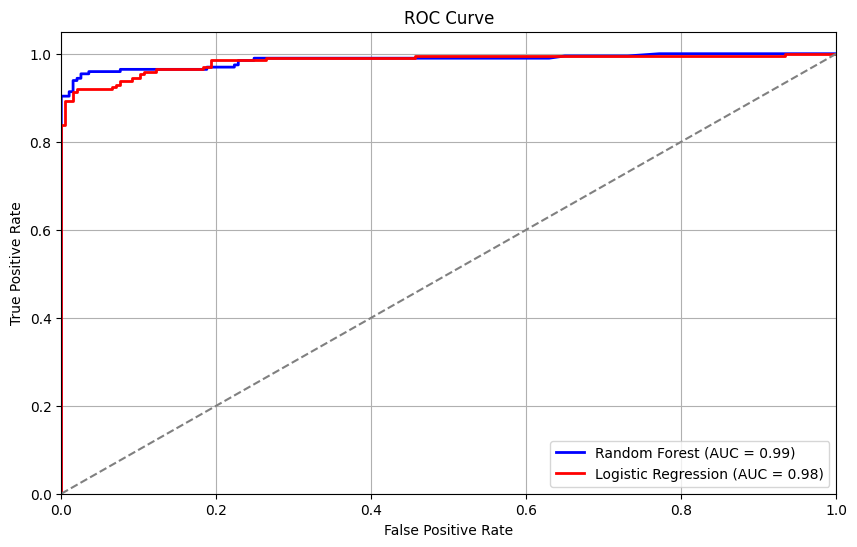

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models with best parameters
best_rf_model = RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
logreg_model = LogisticRegression(random_state=42)

# Fit models
best_rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Random Forest classifier with best parameters
rf_model = RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation Scores: [0.98730159 0.94920635 0.94603175 0.95873016 0.9522293 ]
Mean CV Accuracy: 0.9586998281265797


C:\Users\91952\AppData\Local\Temp\ipykernel_320\3499572579.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:15], palette='viridis')


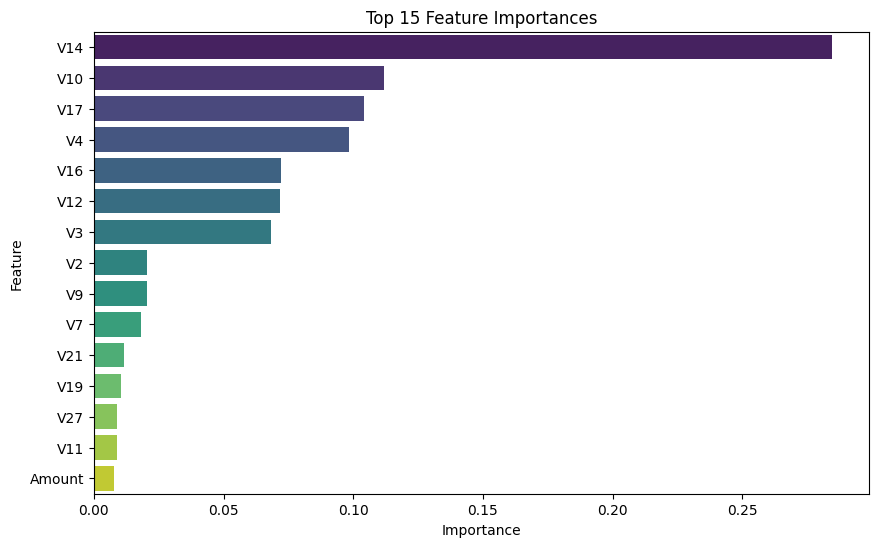

Full Feature Importances:
   Feature  Importance
0      V14    0.284465
1      V10    0.111757
2      V17    0.104262
3       V4    0.098444
4      V16    0.072199
5      V12    0.071617
6       V3    0.068199
7       V2    0.020664
8       V9    0.020457
9       V7    0.018112
10     V21    0.011479
11     V19    0.010536
12     V27    0.009122
13     V11    0.008899
14  Amount    0.007676
15      V8    0.006833
16      V1    0.006825
17     V22    0.006628
18     V23    0.006609
19     V15    0.006338
20     V13    0.006168
21     V20    0.006109
22     V18    0.005664
23     V26    0.005571
24      V6    0.005431
25      V5    0.005159
26     V28    0.004905
27    Time    0.003698
28     V25    0.003141
29     V24    0.003032


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model on the entire training set
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:15], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.show()

# Display all feature importances for reference
print("Full Feature Importances:")
print(feature_importance_df)
